In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

# A. Market Data Processing

In [87]:
(pd.Timestamp('2023-06-30') - pd.Timestamp('2020-07-01')).days + 1

1095

In [88]:
start_day = '2020-07-01'
end_day = '2023-06-30'

## 1. CREDIT SUISSE PRICE AND VOLUME

In [89]:
base_dir = os.getcwd()   # ví dụ .../project/notebooks

# Nhảy lên 1 cấp để tới project/
project_dir = os.path.dirname(base_dir)

# Ghép tới thư mục data
data_dir = os.path.join(project_dir, "data/bronze/market_data")

# Ghép tới file CSV
file_path = os.path.join(data_dir, "PRICE_CS_1D.csv")

df = pd.read_csv(file_path)
df.head()

,time,open,high,low,close,Volume
0,1995-09-28,22.940465,22.940465,22.696417,22.940465,7887.808782
1,1995-09-29,22.696417,23.184512,22.696417,22.696417,4917.075604
2,1995-10-03,23.062489,23.062489,23.062489,23.062489,2151.220577
3,1995-10-04,23.062489,23.062489,23.062489,23.062489,4200.002079
4,1995-10-05,23.184512,23.184512,23.184512,23.184512,204.878150


In [90]:
df_sliver = df[["time", "close", "Volume"]].copy()
df_sliver = df_sliver.rename(columns={"Volume": "volume"})

# đảm bảo time là datetime
df_sliver['time'] = pd.to_datetime(df_sliver['time'])

df_sliver = df_sliver[(df_sliver['time'] >= start_day) & (df_sliver['time'] <= end_day)]  # lọc dữ liệu từ 2020-07-01 đến 2023-06-30

# Tạo index đầy đủ các ngày trong khoảng
full_index = pd.date_range(start=start_day, end=end_day, freq='D')

# Đặt cột time làm index
df_sliver = df_sliver.set_index('time')

# Reindex theo full_index, điền giá trị bằng ffill
df_sliver = df_sliver.reindex(full_index).ffill()

# Đặt lại tên index thành time (nếu muốn giữ cột)
df_sliver.index.name = 'time'
df_sliver = df_sliver.reset_index()

df_sliver.sort_values(by='time', inplace=True)
display(df_sliver.head())
display(df_sliver.tail())

,time,close,volume
0,2020-07-01,10.17,3130467.0
1,2020-07-02,10.31,2342617.0
2,2020-07-03,10.31,2342617.0
3,2020-07-04,10.31,2342617.0
4,2020-07-05,10.31,2342617.0


,time,close,volume
1090,2023-06-26,0.8858,63950993.0
1091,2023-06-27,0.8858,63950993.0
1092,2023-06-28,0.8858,63950993.0
1093,2023-06-29,0.8858,63950993.0
1094,2023-06-30,0.8858,63950993.0


In [91]:
df_sliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1095 non-null   datetime64[ns]
 1   close   1095 non-null   float64       
 2   volume  1095 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 25.8 KB


Không có missing value trước khi CS bị mua lại

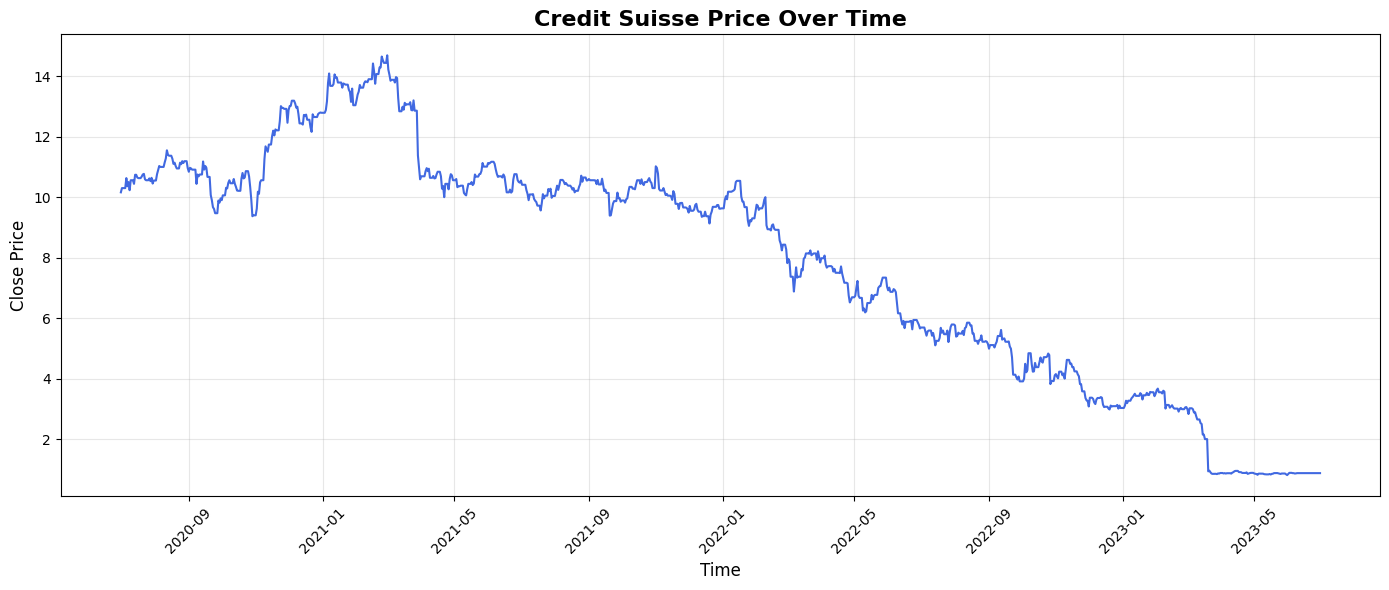

In [92]:
plt.figure(figsize=(14,6))
plt.plot(df_sliver['time'], df_sliver['close'], color='royalblue', linewidth=1.5)

# thêm title, grid, label
plt.title("Credit Suisse Price Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

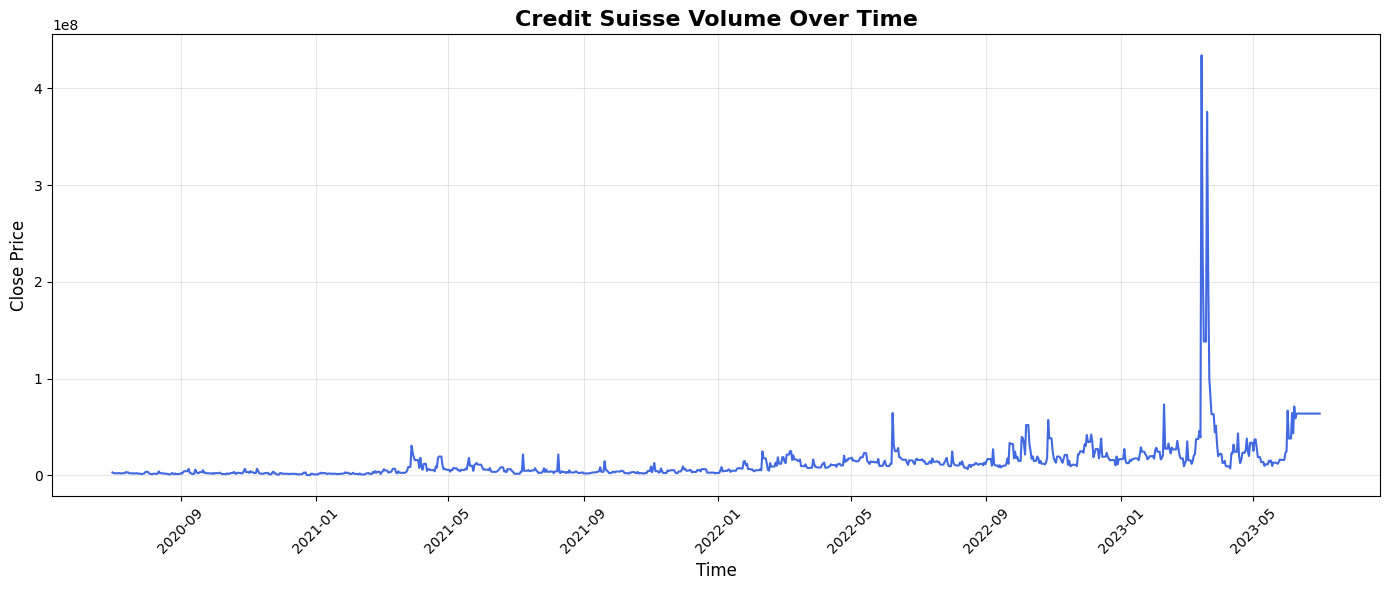

In [93]:
plt.figure(figsize=(14,6))
plt.plot(df_sliver['time'], df_sliver['volume'], color='royalblue', linewidth=1.5)

# thêm title, grid, label
plt.title("Credit Suisse Volume Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
# Tạo thư mục đích nếu chưa có
sliver_dir = os.path.join(project_dir, "data/sliver/market_data")
os.makedirs(sliver_dir, exist_ok=True)

# Ghép path cho file xuất ra
output_path = os.path.join(sliver_dir, "PRICE_CS_1D.csv")

# Xuất df_sliver ra CSV
df_sliver.to_csv(output_path, index=False)

print(f"Đã lưu file tại: {output_path}")

Đã lưu file tại: d:\Git\ToanMoHinh\tmh2025-vong2\data/sliver/market_data\PRICE_CS_1D.csv


---

## 2. CBOE Volatility Index (Fear Index)

In [95]:
base_dir = os.getcwd()   # ví dụ .../project/notebooks

# Nhảy lên 1 cấp để tới project/
project_dir = os.path.dirname(base_dir)

# Ghép tới thư mục data
data_dir = os.path.join(project_dir, "data/bronze/market_data")

# Ghép tới file CSV
file_path = os.path.join(data_dir, "CBOE_Volatility_Index_FRED.csv")

df = pd.read_csv(file_path)
df.head()

,observation_date,VIXCLS
0,1990-01-02,17.24
1,1990-01-03,18.19
2,1990-01-04,19.22
3,1990-01-05,20.11
4,1990-01-08,20.26


In [96]:
df = df.rename(columns={"observation_date": "time", "VIXCLS": "close"})
df_sliver = df[["time", "close"]].copy()

# đảm bảo time là datetime
df_sliver['time'] = pd.to_datetime(df_sliver['time'])

df_sliver = df_sliver[(df_sliver['time'] >= start_day) & (df_sliver['time'] <= end_day)]  # lọc dữ liệu từ 2020-07-01 đến 2023-06-30

# Tạo index đầy đủ các ngày trong khoảng
full_index = pd.date_range(start=start_day, end=end_day, freq='D')

# Đặt cột time làm index
df_sliver = df_sliver.set_index('time')

# Reindex theo full_index, điền giá trị bằng ffill
df_sliver = df_sliver.reindex(full_index).ffill()

# Đặt lại tên index thành time (nếu muốn giữ cột)
df_sliver.index.name = 'time'
df_sliver = df_sliver.reset_index()

df_sliver.sort_values(by='time', inplace=True)
display(df_sliver.head())
display(df_sliver.tail())

,time,close
0,2020-07-01,28.62
1,2020-07-02,27.68
2,2020-07-03,27.68
3,2020-07-04,27.68
4,2020-07-05,27.68


,time,close
1090,2023-06-26,14.25
1091,2023-06-27,13.74
1092,2023-06-28,13.43
1093,2023-06-29,13.54
1094,2023-06-30,13.59


In [97]:
df_sliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1095 non-null   datetime64[ns]
 1   close   1095 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


Không có missing value

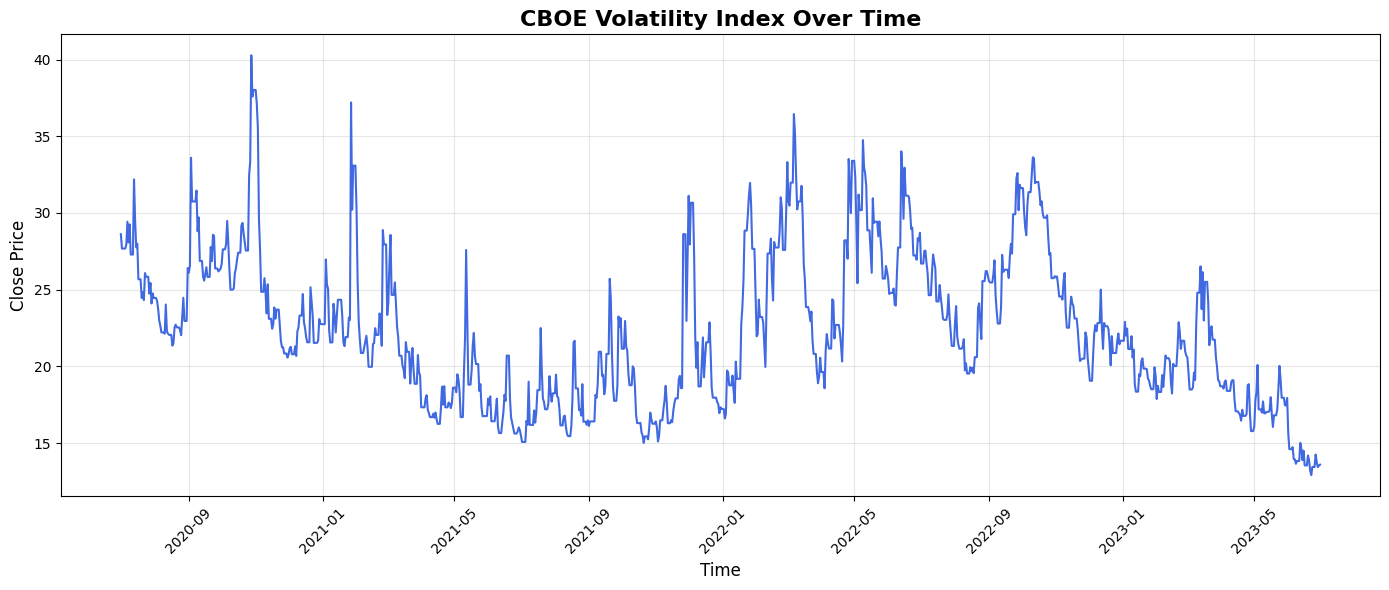

In [98]:
plt.figure(figsize=(14,6))
plt.plot(df_sliver['time'], df_sliver['close'], color='royalblue', linewidth=1.5)

# thêm title, grid, label
plt.title("CBOE Volatility Index Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
# Tạo thư mục đích nếu chưa có
sliver_dir = os.path.join(project_dir, "data/sliver/market_data")
os.makedirs(sliver_dir, exist_ok=True)

# Ghép path cho file xuất ra
output_path = os.path.join(sliver_dir, "CBOE_Volatility_Index_FRED.csv")

# Xuất df_sliver ra CSV
df_sliver.to_csv(output_path, index=False)

print(f"Đã lưu file tại: {output_path}")

Đã lưu file tại: d:\Git\ToanMoHinh\tmh2025-vong2\data/sliver/market_data\CBOE_Volatility_Index_FRED.csv


---

## 3. STOXX Banks EUR Price (SX7E)

In [100]:
base_dir = os.getcwd()   # ví dụ .../project/notebooks

# Nhảy lên 1 cấp để tới project/
project_dir = os.path.dirname(base_dir)

# Ghép tới thư mục data
data_dir = os.path.join(project_dir, "data/bronze/market_data")

# Ghép tới file CSV
file_path = os.path.join(data_dir, "SX7E_STOXX_Banks_EUR_Price.csv")

df = pd.read_csv(file_path)
df.head()

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,14/08/2025,235.63,233.12,235.84,233.10,NaN,1.19%
1,13/08/2025,232.86,231.10,233.19,231.10,NaN,0.86%
2,12/08/2025,230.87,230.57,231.76,229.88,NaN,0.32%
3,11/08/2025,230.13,229.33,230.47,227.28,NaN,0.51%
4,08/08/2025,228.97,224.99,229.18,224.72,NaN,1.89%


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ngày        3239 non-null   object 
 1   Lần cuối    3239 non-null   float64
 2   Mở          3239 non-null   float64
 3   Cao         3239 non-null   float64
 4   Thấp        3239 non-null   float64
 5   KL          0 non-null      float64
 6   % Thay đổi  3239 non-null   object 
dtypes: float64(5), object(2)
memory usage: 177.3+ KB


In [102]:
df = df.rename(columns={"Ngày": "time", "Lần cuối": "close"})

df_sliver = df[["time", "close"]].copy()

# đảm bảo time là datetime
df_sliver['time'] = pd.to_datetime(df_sliver['time'])

df_sliver = df_sliver[(df_sliver['time'] >= start_day) & (df_sliver['time'] <= end_day)]  # lọc dữ liệu từ 2020-07-01 đến 2023-06-30

# Tạo index đầy đủ các ngày trong khoảng
full_index = pd.date_range(start=start_day, end=end_day, freq='D')

# Đặt cột time làm index
df_sliver = df_sliver.set_index('time')

# Reindex theo full_index, điền giá trị bằng ffill
df_sliver = df_sliver.reindex(full_index).ffill()

# Đặt lại tên index thành time (nếu muốn giữ cột)
df_sliver.index.name = 'time'
df_sliver = df_sliver.reset_index()

df_sliver.sort_values(by='time', inplace=True)
display(df_sliver.head())
display(df_sliver.tail())

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\1471234335.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sliver['time'] = pd.to_datetime(df_sliver['time'])


,time,close
0,2020-07-01,62.17
1,2020-07-02,65.21
2,2020-07-03,64.42
3,2020-07-04,64.42
4,2020-07-05,64.42


,time,close
1090,2023-06-26,102.54
1091,2023-06-27,103.88
1092,2023-06-28,104.59
1093,2023-06-29,106.12
1094,2023-06-30,107.35


In [103]:
df_sliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1095 non-null   datetime64[ns]
 1   close   1095 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


Không có missing value

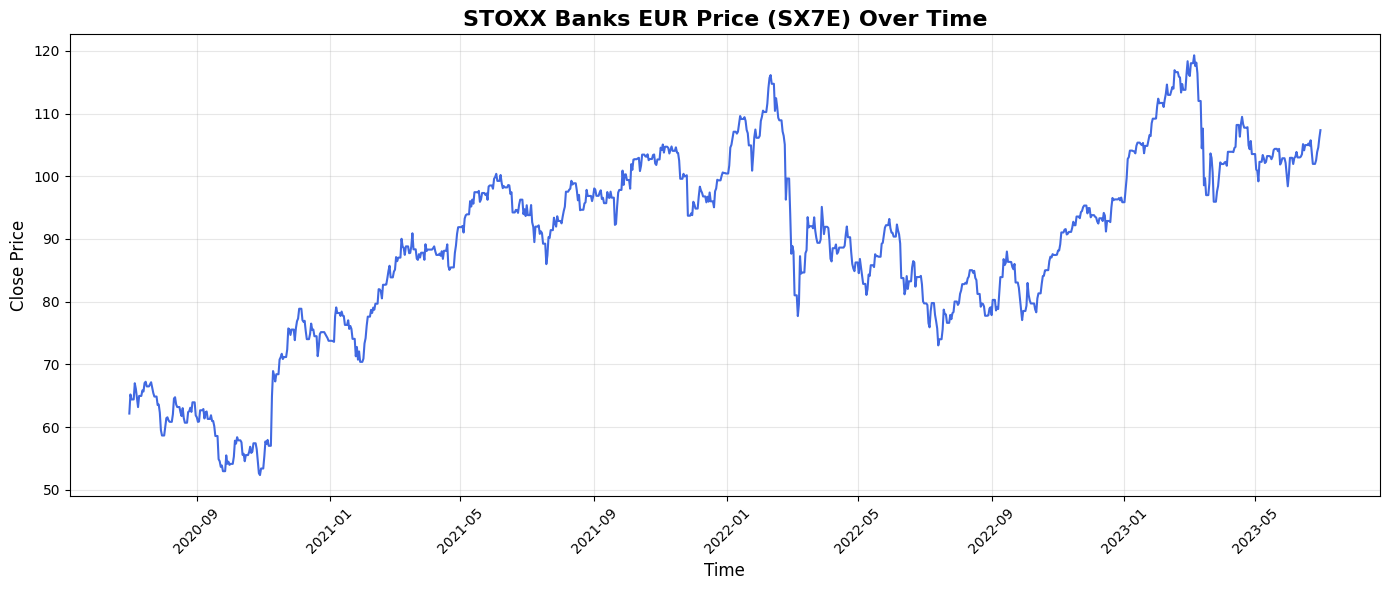

In [104]:
plt.figure(figsize=(14,6))
plt.plot(df_sliver['time'], df_sliver['close'], color='royalblue', linewidth=1.5)

# thêm title, grid, label
plt.title("STOXX Banks EUR Price (SX7E) Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [105]:
# Tạo thư mục đích nếu chưa có
sliver_dir = os.path.join(project_dir, "data/sliver/market_data")
os.makedirs(sliver_dir, exist_ok=True)

# Ghép path cho file xuất ra
output_path = os.path.join(sliver_dir, "SX7E_STOXX_Banks_EUR_Price.csv")

# Xuất df_sliver ra CSV
df_sliver.to_csv(output_path, index=False)

print(f"Đã lưu file tại: {output_path}")

Đã lưu file tại: d:\Git\ToanMoHinh\tmh2025-vong2\data/sliver/market_data\SX7E_STOXX_Banks_EUR_Price.csv


---

## 4. CDS 5 YEAR EUR Credit Suisse

In [106]:
base_dir = os.getcwd()   # ví dụ .../project/notebooks

# Nhảy lên 1 cấp để tới project/
project_dir = os.path.dirname(base_dir)

# Ghép tới thư mục data
data_dir = os.path.join(project_dir, "data/bronze/market_data")

# Ghép tới file CSV
file_path = os.path.join(data_dir, "CDS_5Y_CS_1D.csv")

df = pd.read_csv(file_path)
df.head()

,Ngày,Lần cuối,Mở,Cao,Thấp,% Thay đổi
0,19/07/2023,93.03,93.03,93.03,93.03,-1.06%
1,18/07/2023,94.03,94.03,94.03,92.52,5.57%
2,17/07/2023,89.07,89.07,94.01,89.07,-1.10%
3,14/07/2023,90.06,90.06,90.06,89.53,-1.64%
4,13/07/2023,91.56,91.56,91.56,91.56,-1.06%


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ngày        4045 non-null   object
 1   Lần cuối    4045 non-null   object
 2   Mở          4045 non-null   object
 3   Cao         4045 non-null   object
 4   Thấp        4045 non-null   object
 5   % Thay đổi  4045 non-null   object
dtypes: object(6)
memory usage: 189.7+ KB


In [108]:
df = df.rename(columns={"Ngày": "time", "Lần cuối": "close"})

df_sliver = df[["time", "close"]].copy()

# đảm bảo time là datetime
df_sliver['time'] = pd.to_datetime(df_sliver['time'])

df_sliver = df_sliver[(df_sliver['time'] >= start_day) & (df_sliver['time'] <= end_day)]  # lọc dữ liệu từ 2020-07-01 đến 2023-06-30

df_sliver['close'] = pd.to_numeric(df_sliver['close'], errors='coerce')

# Tạo index đầy đủ các ngày trong khoảng
full_index = pd.date_range(start=start_day, end=end_day, freq='D')

# Đặt cột time làm index
df_sliver = df_sliver.set_index('time')

# Reindex theo full_index, điền giá trị bằng ffill
df_sliver = df_sliver.reindex(full_index).ffill()

# Đặt lại tên index thành time (nếu muốn giữ cột)
df_sliver.index.name = 'time'
df_sliver = df_sliver.reset_index()

df_sliver.sort_values(by='time', inplace=True)
display(df_sliver.head())
display(df_sliver.tail())

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\2160517154.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sliver['time'] = pd.to_datetime(df_sliver['time'])


,time,close
0,2020-07-01,73.88
1,2020-07-02,71.65
2,2020-07-03,71.90
3,2020-07-04,71.90
4,2020-07-05,71.90


,time,close
1090,2023-06-26,101.49
1091,2023-06-27,101.48
1092,2023-06-28,100.99
1093,2023-06-29,100.00
1094,2023-06-30,99.00


In [109]:
df_sliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1095 non-null   datetime64[ns]
 1   close   1095 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


Không có missing value

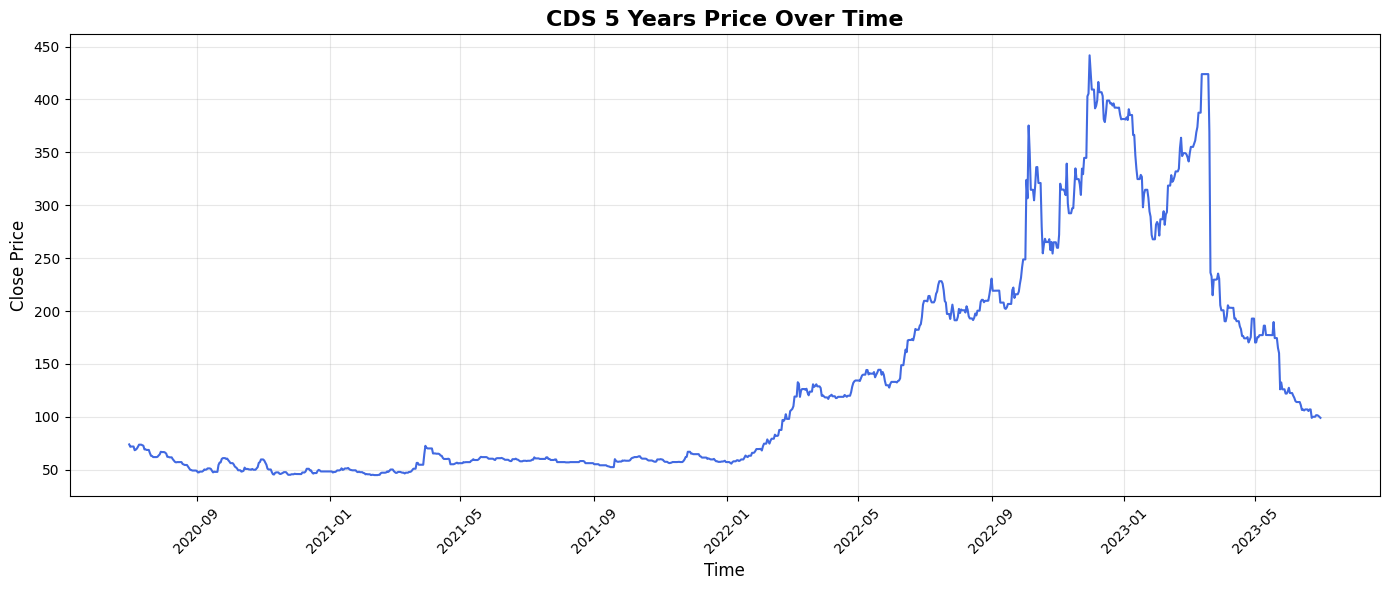

In [110]:
plt.figure(figsize=(14,6))
plt.plot(df_sliver['time'], df_sliver['close'], color='royalblue', linewidth=1.5)

# thêm title, grid, label
plt.title("CDS 5 Years Price Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [111]:
# Tạo thư mục đích nếu chưa có
sliver_dir = os.path.join(project_dir, "data/sliver/market_data")
os.makedirs(sliver_dir, exist_ok=True)

# Ghép path cho file xuất ra
output_path = os.path.join(sliver_dir, "CDS_5Y_CS_1D.csv.csv")

# Xuất df_sliver ra CSV
df_sliver.to_csv(output_path, index=False)

print(f"Đã lưu file tại: {output_path}")

Đã lưu file tại: d:\Git\ToanMoHinh\tmh2025-vong2\data/sliver/market_data\CDS_5Y_CS_1D.csv.csv


## 5. HOUSE - VNINDEX

In [112]:
base_dir = os.getcwd()   # ví dụ .../project/notebooks

# Nhảy lên 1 cấp để tới project/
project_dir = os.path.dirname(base_dir)

# Ghép tới thư mục data
data_dir = os.path.join(project_dir, "data/bronze/market_data")

# Ghép tới file CSV
file_path = os.path.join(data_dir, "VNINDEX_1D.csv")

df = pd.read_csv(file_path)
df.head()

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,31/12/2024,"1,266.78","1,272.25","1,272.46","1,266.78",480.54K,-0.41%
1,30/12/2024,"1,272.02","1,275.14","1,275.14","1,268.77",527.66K,-0.24%
2,27/12/2024,"1,275.14","1,272.87","1,277.89","1,272.23",670.32K,0.18%
3,26/12/2024,"1,272.87","1,275.68","1,277.17","1,271.99",595.22K,-0.09%
4,25/12/2024,"1,274.04","1,260.81","1,283.09","1,260.81",810.46K,1.09%


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ngày        1250 non-null   object
 1   Lần cuối    1250 non-null   object
 2   Mở          1250 non-null   object
 3   Cao         1250 non-null   object
 4   Thấp        1250 non-null   object
 5   KL          1250 non-null   object
 6   % Thay đổi  1250 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [114]:
df = df.rename(columns={"Ngày": "time", "Lần cuối": "close", "KL": "volume"})

df_sliver = df[["time", "close", "volume"]].copy()

# đảm bảo time là datetime
df_sliver['time'] = pd.to_datetime(df_sliver['time'])

df_sliver = df_sliver[(df_sliver['time'] >= start_day) & (df_sliver['time'] <= '2024-12-31')]  # lọc dữ liệu từ 2020-07-01 đến 2024-12-31

df_sliver['close'] = df_sliver['close'].str.replace(',', '').astype(float)

# Tạo index đầy đủ các ngày trong khoảng
full_index = pd.date_range(start=start_day, end='2024-12-31', freq='D')

# Đặt cột time làm index
df_sliver = df_sliver.set_index('time')

# Reindex theo full_index, điền giá trị bằng ffill
df_sliver = df_sliver.reindex(full_index).ffill()

# Đặt lại tên index thành time (nếu muốn giữ cột)
df_sliver.index.name = 'time'
df_sliver = df_sliver.reset_index()

df_sliver.sort_values(by='time', inplace=True)
display(df_sliver.head())
display(df_sliver.tail())

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\35484039.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sliver['time'] = pd.to_datetime(df_sliver['time'])


,time,close,volume
0,2020-07-01,843.49,303.55K
1,2020-07-02,842.38,223.80K
2,2020-07-03,847.61,203.00K
3,2020-07-04,847.61,203.00K
4,2020-07-05,847.61,203.00K


,time,close,volume
1640,2024-12-27,1275.14,670.32K
1641,2024-12-28,1275.14,670.32K
1642,2024-12-29,1275.14,670.32K
1643,2024-12-30,1272.02,527.66K
1644,2024-12-31,1266.78,480.54K


In [115]:
def convert_volume(x):
    if isinstance(x, str):
        x = x.replace(",", "").strip()  # bỏ dấu phẩy nếu có
        if x.endswith("K"):
            return float(x[:-1]) * 1e3
        elif x.endswith("M"):
            return float(x[:-1]) * 1e6
        elif x.endswith("B"):
            return float(x[:-1]) * 1e9
        else:
            return float(x)  # trường hợp không có hậu tố
    return x

# Áp dụng vào cột volume
df_sliver["volume"] = df_sliver["volume"].apply(convert_volume)

# Kiểm tra lại
print(df_sliver.dtypes)
display(df_sliver.head())

time      datetime64[ns]
close            float64
volume           float64
dtype: object


,time,close,volume
0,2020-07-01,843.49,303550.0
1,2020-07-02,842.38,223800.0
2,2020-07-03,847.61,203000.0
3,2020-07-04,847.61,203000.0
4,2020-07-05,847.61,203000.0


In [116]:
df_sliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1645 non-null   datetime64[ns]
 1   close   1645 non-null   float64       
 2   volume  1645 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.7 KB


Không có missing value

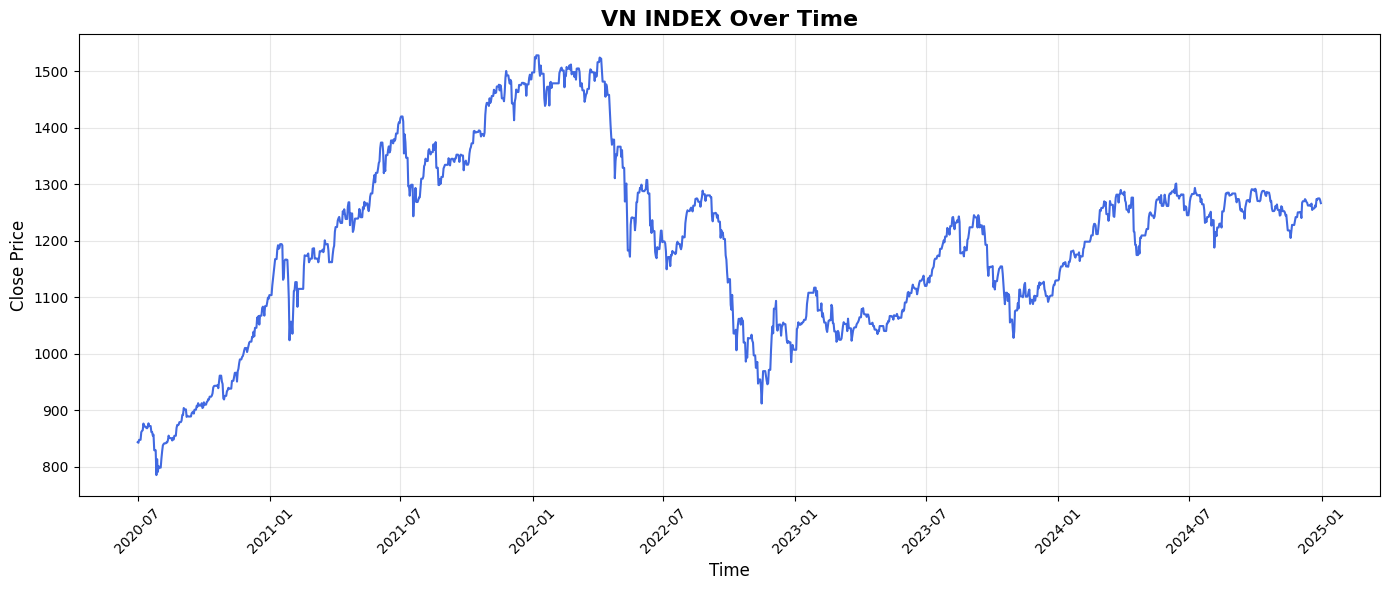

In [117]:
plt.figure(figsize=(14,6))
plt.plot(df_sliver['time'], df_sliver['close'], color='royalblue', linewidth=1.5)

# thêm title, grid, label
plt.title("VN INDEX Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [118]:
# Tạo thư mục đích nếu chưa có
sliver_dir = os.path.join(project_dir, "data/sliver/market_data")
os.makedirs(sliver_dir, exist_ok=True)

# Ghép path cho file xuất ra
output_path = os.path.join(sliver_dir, "VNINDEX_1D.csv")

# Xuất df_sliver ra CSV
df_sliver.to_csv(output_path, index=False)

print(f"Đã lưu file tại: {output_path}")

Đã lưu file tại: d:\Git\ToanMoHinh\tmh2025-vong2\data/sliver/market_data\VNINDEX_1D.csv


## 6. HNX - HNXINDEX

In [119]:
base_dir = os.getcwd()   # ví dụ .../project/notebooks

# Nhảy lên 1 cấp để tới project/
project_dir = os.path.dirname(base_dir)

# Ghép tới thư mục data
data_dir = os.path.join(project_dir, "data/bronze/market_data")

# Ghép tới file CSV
file_path = os.path.join(data_dir, "HNXINDEX_1D.csv")

df = pd.read_csv(file_path)
df.head()

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,31/12/2024,227.43,228.03,228.34,226.43,36.15K,-0.31%
1,30/12/2024,228.14,228.88,229.34,227.13,34.86K,-0.43%
2,27/12/2024,229.13,230.03,230.50,228.55,46.74K,-0.33%
3,26/12/2024,229.90,229.75,230.87,228.96,40.62K,0.04%
4,25/12/2024,229.81,227.53,230.90,225.52,66.94K,0.63%


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ngày        1250 non-null   object 
 1   Lần cuối    1250 non-null   float64
 2   Mở          1250 non-null   float64
 3   Cao         1250 non-null   float64
 4   Thấp        1250 non-null   float64
 5   KL          1250 non-null   object 
 6   % Thay đổi  1250 non-null   object 
dtypes: float64(4), object(3)
memory usage: 68.5+ KB


In [121]:
df = df.rename(columns={"Ngày": "time", "Lần cuối": "close", "KL": "volume"})

df_sliver = df[["time", "close", "volume"]].copy()

# đảm bảo time là datetime
df_sliver['time'] = pd.to_datetime(df_sliver['time'])

df_sliver = df_sliver[(df_sliver['time'] >= start_day) & (df_sliver['time'] <= '2024-12-31')]  # lọc dữ liệu từ 2020-07-01 đến 2024-12-31

# df_sliver['close'] = df_sliver['close'].str.replace(',', '').astype(float)

# Tạo index đầy đủ các ngày trong khoảng
full_index = pd.date_range(start=start_day, end='2024-12-31', freq='D')

# Đặt cột time làm index
df_sliver = df_sliver.set_index('time')

# Reindex theo full_index, điền giá trị bằng ffill
df_sliver = df_sliver.reindex(full_index).ffill()

# Đặt lại tên index thành time (nếu muốn giữ cột)
df_sliver.index.name = 'time'
df_sliver = df_sliver.reset_index()

df_sliver.sort_values(by='time', inplace=True)
display(df_sliver.head())
display(df_sliver.tail())

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3869450535.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sliver['time'] = pd.to_datetime(df_sliver['time'])


,time,close,volume
0,2020-07-01,111.69,33.09K
1,2020-07-02,111.61,24.01K
2,2020-07-03,111.55,31.46K
3,2020-07-04,111.55,31.46K
4,2020-07-05,111.55,31.46K


,time,close,volume
1640,2024-12-27,229.13,46.74K
1641,2024-12-28,229.13,46.74K
1642,2024-12-29,229.13,46.74K
1643,2024-12-30,228.14,34.86K
1644,2024-12-31,227.43,36.15K


In [122]:
# Áp dụng vào cột volume
df_sliver["volume"] = df_sliver["volume"].apply(convert_volume)

# Kiểm tra lại
print(df_sliver.dtypes)
display(df_sliver.head())

time      datetime64[ns]
close            float64
volume           float64
dtype: object


,time,close,volume
0,2020-07-01,111.69,33090.0
1,2020-07-02,111.61,24010.0
2,2020-07-03,111.55,31460.0
3,2020-07-04,111.55,31460.0
4,2020-07-05,111.55,31460.0


In [123]:
df_sliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1645 non-null   datetime64[ns]
 1   close   1645 non-null   float64       
 2   volume  1645 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.7 KB


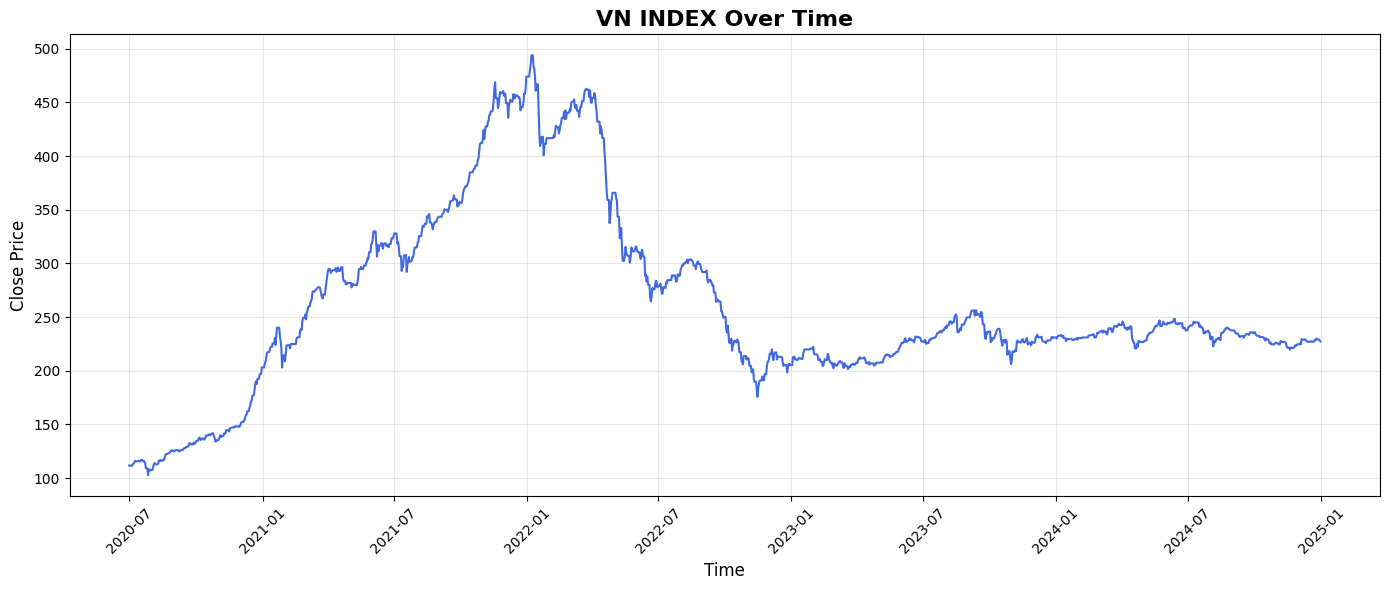

In [124]:
plt.figure(figsize=(14,6))
plt.plot(df_sliver['time'], df_sliver['close'], color='royalblue', linewidth=1.5)

# thêm title, grid, label
plt.title("VN INDEX Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [125]:
# Tạo thư mục đích nếu chưa có
sliver_dir = os.path.join(project_dir, "data/sliver/market_data")
os.makedirs(sliver_dir, exist_ok=True)

# Ghép path cho file xuất ra
output_path = os.path.join(sliver_dir, "HNXINDEX_1D.csv")

# Xuất df_sliver ra CSV
df_sliver.to_csv(output_path, index=False)

print(f"Đã lưu file tại: {output_path}")

Đã lưu file tại: d:\Git\ToanMoHinh\tmh2025-vong2\data/sliver/market_data\HNXINDEX_1D.csv


# B. MARCO ECONOMIC DATA

## 1. GROW AND INFLACTION

In [165]:
start_day = "2020-07-01"
end_day = "2023-06-30"

### 1.1 SWITZERLAND CPI

In [166]:
base_dir = os.getcwd()   # ví dụ .../project/notebooks

# Nhảy lên 1 cấp để tới project/
project_dir = os.path.dirname(base_dir)

# Ghép tới thư mục data
data_dir = os.path.join(project_dir, r"data\bronze\macro_economic_data\growth_and_inflation")

# Ghép tới file CSV
file_path = os.path.join(data_dir, "ECONOMICS_CHCPI-1D.csv")

df = pd.read_csv(file_path)
df.head()

,time,close,Volume
0,1950-01-31,21.17,NaN
1,1950-02-28,21.09,NaN
2,1950-03-31,21.05,NaN
3,1950-04-30,20.99,NaN
4,1950-05-31,21.08,NaN


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    907 non-null    object 
 1   close   907 non-null    float64
 2   Volume  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 21.4+ KB


In [168]:
# Chọn cột cần thiết
df_sliver = df[["time", "close", "Volume"]].copy()
df_sliver = df_sliver.rename(columns={"Volume": "volume"})
df_sliver['time'] = pd.to_datetime(df_sliver['time'])

# Lọc trong khoảng
df_sliver = df_sliver[(df_sliver['time'] >= start_day) & (df_sliver['time'] <= end_day)]

# Đặt index
df_sliver = df_sliver.set_index("time")

# Reindex với full calendar
full_index = pd.date_range(start=start_day, end=end_day, freq="D")
df_sliver = df_sliver.reindex(full_index)

# --- Fix giá trị cho ngày start_day ---
# Lấy dữ liệu ngày trước start_day
prev_row = df[df['time'] < start_day].sort_values(by="time").iloc[-1]
df_sliver.loc[pd.to_datetime(start_day), ["close", "volume"]] = [prev_row["close"], prev_row["Volume"]]

# Ffill cho các ngày còn lại (02/07 trở đi)
df_sliver = df_sliver.ffill()

# Reset index
df_sliver.index.name = "time"
df_sliver = df_sliver.reset_index()

df_sliver.sort_values(by='time', inplace=True)
display(df_sliver.head())
display(df_sliver.tail())

,time,close,volume
0,2020-07-01,100.5,NaN
1,2020-07-02,100.5,NaN
2,2020-07-03,100.5,NaN
3,2020-07-04,100.5,NaN
4,2020-07-05,100.5,NaN


,time,close,volume
1090,2023-06-26,106.25,NaN
1091,2023-06-27,106.25,NaN
1092,2023-06-28,106.25,NaN
1093,2023-06-29,106.25,NaN
1094,2023-06-30,106.32,NaN


In [169]:
df_sliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1095 non-null   datetime64[ns]
 1   close   1095 non-null   float64       
 2   volume  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 25.8 KB


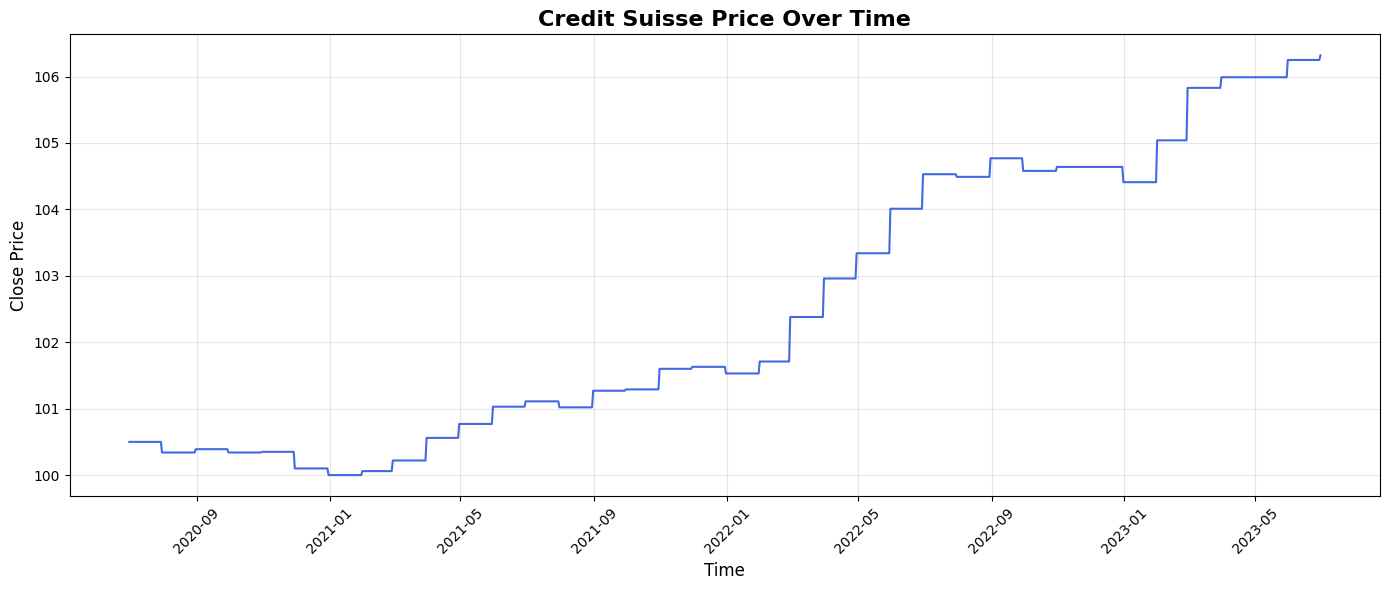

In [170]:
plt.figure(figsize=(14,6))
plt.plot(df_sliver['time'], df_sliver['close'], color='royalblue', linewidth=1.5)

# thêm title, grid, label
plt.title("Credit Suisse Price Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [171]:
# Tạo thư mục đích nếu chưa có
sliver_dir = os.path.join(project_dir, "data/sliver/macro_economic_data/growth_and_inflation")
os.makedirs(sliver_dir, exist_ok=True)

# Ghép path cho file xuất ra
output_path = os.path.join(sliver_dir, "ECONOMICS_CHCPI-1D.csv")

# Xuất df_sliver ra CSV
df_sliver.to_csv(output_path, index=False)

print(f"Đã lưu file tại: {output_path}")

Đã lưu file tại: d:\Git\ToanMoHinh\tmh2025-vong2\data/sliver/macro_economic_data/growth_and_inflation\ECONOMICS_CHCPI-1D.csv


---

### 1.2 SWITZERLAND GDP

In [172]:
base_dir = os.getcwd()   # ví dụ .../project/notebooks

# Nhảy lên 1 cấp để tới project/
project_dir = os.path.dirname(base_dir)

# Ghép tới thư mục data
data_dir = os.path.join(project_dir, r"data\bronze\macro_economic_data\growth_and_inflation")

# Ghép tới file CSV
file_path = os.path.join(data_dir, "ECONOMICS_CHGDPCP_1D.csv")

df = pd.read_csv(file_path)
df.head()

,time,close,Volume
0,1980-03-31,9.035605e+10,NaN
1,1980-06-30,9.049649e+10,NaN
2,1980-09-30,9.095763e+10,NaN
3,1980-12-31,9.148353e+10,NaN
4,1981-03-31,9.144751e+10,NaN


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    181 non-null    object 
 1   close   181 non-null    float64
 2   Volume  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 4.4+ KB


In [174]:
# Chọn cột cần thiết
df_sliver = df[["time", "close", "Volume"]].copy()
df_sliver = df_sliver.rename(columns={"Volume": "volume"})
df_sliver['time'] = pd.to_datetime(df_sliver['time'])

# Lọc trong khoảng
df_sliver = df_sliver[(df_sliver['time'] >= start_day) & (df_sliver['time'] <= end_day)]

# Đặt index
df_sliver = df_sliver.set_index("time")

# Reindex với full calendar
full_index = pd.date_range(start=start_day, end=end_day, freq="D")
df_sliver = df_sliver.reindex(full_index)

# --- Fix giá trị cho ngày start_day ---
# Lấy dữ liệu ngày trước start_day
prev_row = df[df['time'] < start_day].sort_values(by="time").iloc[-1]
df_sliver.loc[pd.to_datetime(start_day), ["close", "volume"]] = [prev_row["close"], prev_row["Volume"]]

# Ffill cho các ngày còn lại (02/07 trở đi)
df_sliver = df_sliver.ffill()

# Reset index
df_sliver.index.name = "time"
df_sliver = df_sliver.reset_index()

df_sliver.sort_values(by='time', inplace=True)
display(df_sliver.head())
display(df_sliver.tail())

,time,close,volume
0,2020-07-01,1.668155e+11,NaN
1,2020-07-02,1.668155e+11,NaN
2,2020-07-03,1.668155e+11,NaN
3,2020-07-04,1.668155e+11,NaN
4,2020-07-05,1.668155e+11,NaN


,time,close,volume
1090,2023-06-26,1.915362e+11,NaN
1091,2023-06-27,1.915362e+11,NaN
1092,2023-06-28,1.915362e+11,NaN
1093,2023-06-29,1.915362e+11,NaN
1094,2023-06-30,1.911890e+11,NaN


In [175]:
df_sliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1095 non-null   datetime64[ns]
 1   close   1095 non-null   float64       
 2   volume  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 25.8 KB


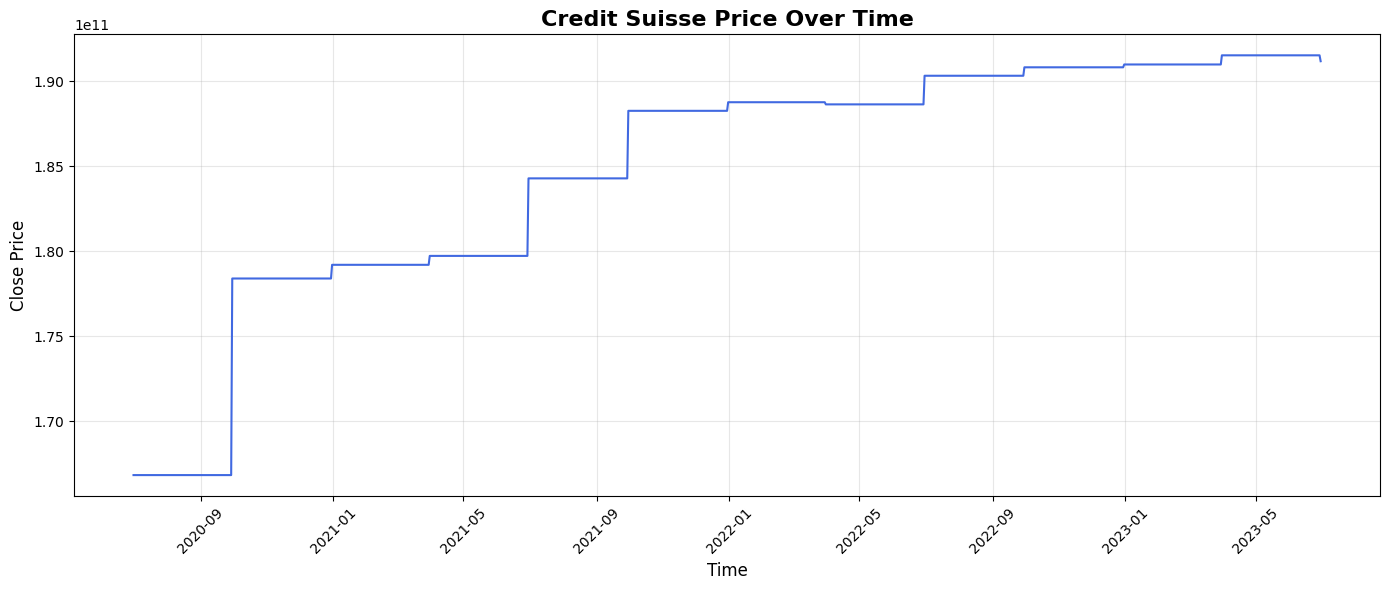

In [176]:
plt.figure(figsize=(14,6))
plt.plot(df_sliver['time'], df_sliver['close'], color='royalblue', linewidth=1.5)

# thêm title, grid, label
plt.title("Credit Suisse Price Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
# Tạo thư mục đích nếu chưa có
sliver_dir = os.path.join(project_dir, "data/sliver/macro_economic_data/growth_and_inflation")
os.makedirs(sliver_dir, exist_ok=True)

# Ghép path cho file xuất ra
output_path = os.path.join(sliver_dir, "ECONOMICS_CHGDPCP_1D.csv")

# Xuất df_sliver ra CSV
df_sliver.to_csv(output_path, index=False)

print(f"Đã lưu file tại: {output_path}")

Đã lưu file tại: d:\Git\ToanMoHinh\tmh2025-vong2\data/sliver/macro_economic_data/growth_and_inflation\ECONOMICS_CHGDPCP_1D.csv


## 2. POLICY INTEREST RATE